# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results = mouse_metadata.rename(columns={'"Mouse ID"':'Mouse ID'}, inplace=True) 
mouse_complete = pd.merge(mouse_metadata, study_results, how= 'left', on=["Mouse ID"])

# Display the data table for preview
mouse_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
print(len(mouse_complete.value_counts(["Mouse ID"])))

249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Code from pandas documentation 
munique = mouse_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
munique.value_counts(["Mouse ID", "Timepoint"])

Mouse ID  Timepoint
a203      0            1
q597      40           1
q633      10           1
          5            1
          0            1
                      ..
i334      5            1
          0            1
i177      45           1
          40           1
z969      45           1
Name: count, Length: 1888, dtype: int64

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
munique.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
len(munique.value_counts(["Mouse ID"]))

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


mean_munique = munique.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean()
med_munique = munique.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median()
var_munique = munique.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var()
std_munique = munique.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std()
sem_munique = munique.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem()

summ_munique = pd.concat([mean_munique, med_munique, var_munique, std_munique, sem_munique],axis=1,sort=False)
summ_munique.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std.Dev.", "Tumor Volume Std. Err."]
summ_munique

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [90]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

munique.groupby('Tumor Volume (mm3)').agg(['Drug Regimen','mean', 'med', 'var', 'std', 'sem'])

AttributeError: 'SeriesGroupBy' object has no attribute 'Drug Regimen'

## Bar and Pie Charts

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_num = munique.groupby(["Drug Regimen"])["Mouse ID"].count().reset_index(name = 'Mouse Total')
drug_num

,Drug Regimen,Mouse Total
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


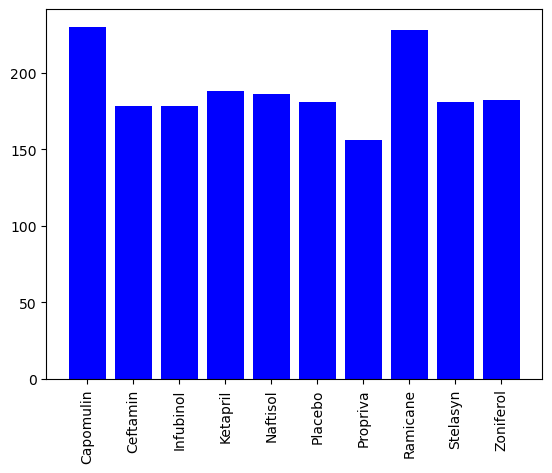

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(drug_num))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, drug_num["Mouse Total"], color='b', align='center')
plt.xticks(tick_locations, drug_num["Drug Regimen"], rotation="vertical")
plt.ylabel = ("# of Observed Mouse Timepoints")
plt.xlabel = ("Drug Regimen")
plt.title = ("Mice Tested vs. Drug Tested")
plt.show()

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drug_sex = munique.groupby(["Sex"])["Sex"].value_counts()
drug_sex

Sex
Female    930
Male      958
Name: count, dtype: int64

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = ["Female", "Male"] 
sexcount = [930, 958]
colors = ["blue","orange"]
explode =(0,0)

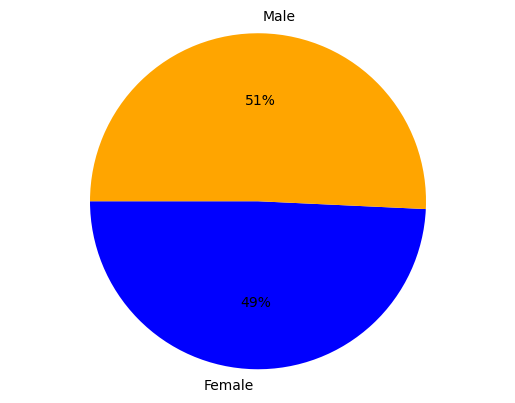

In [28]:
plt.pie(sexcount, explode = explode, labels = sexes, colors = colors, autopct="%1.0f%%", shadow=False, startangle=180)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

munique_clean = munique.drop_duplicates(subset=["Mouse ID"], keep="last")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#munique_combo = pd.merge(munique_clean, study_results, how="left", on=["Mouse ID"])
#munique_combo.head()
munique_clean.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


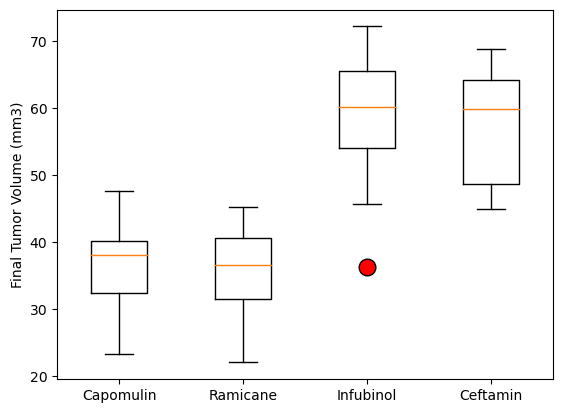

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

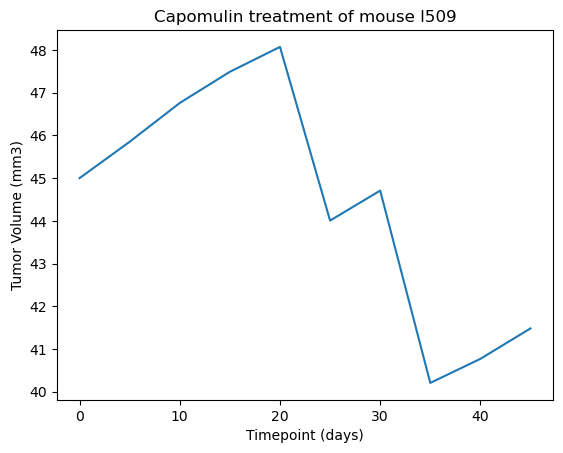

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


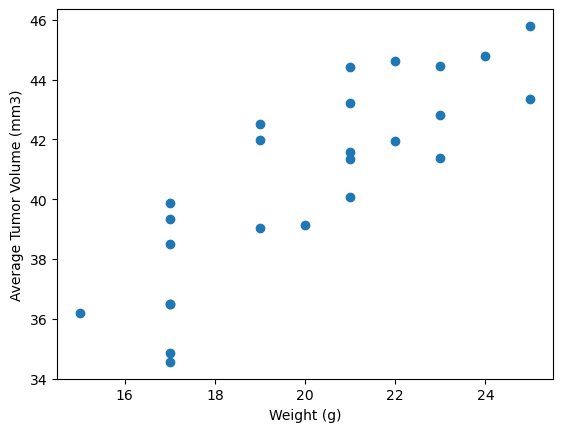

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


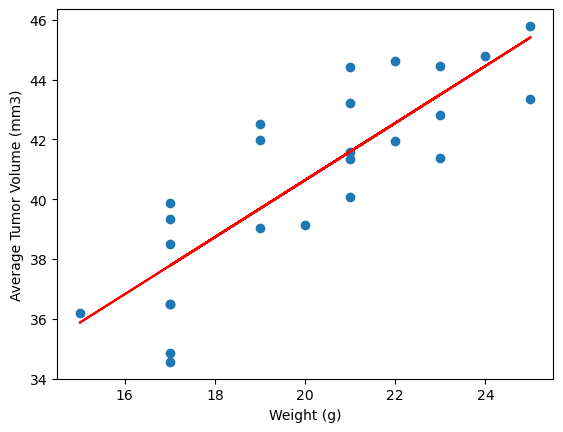

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
